<a href="https://colab.research.google.com/github/Sheetal25-pixel/end-to-end/blob/main/ISRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
import zipfile
import os


In [13]:
uploaded = files.upload()  # This will allow you to upload a file


Saving gadm41_IND_shp.zip to gadm41_IND_shp.zip


In [14]:
# Assuming the uploaded file is a ZIP file
zip_filename = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Extract the ZIP file
extract_folder = zip_filename.replace('.zip', '')  # Folder to extract files
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files extracted to: {extract_folder}")


Files extracted to: gadm41_IND_shp


In [15]:
# List the files in the extracted folder
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)


Extracted files: ['gadm41_IND_3.shx', 'gadm41_IND_0.prj', 'gadm41_IND_0.shp', 'gadm41_IND_1.cpg', 'gadm41_IND_1.dbf', 'gadm41_IND_3.dbf', 'gadm41_IND_3.shp', 'gadm41_IND_3.cpg', 'gadm41_IND_1.shx', 'gadm41_IND_0.shx', 'gadm41_IND_1.shp', 'gadm41_IND_2.shx', 'gadm41_IND_1.prj', 'gadm41_IND_3.prj', 'gadm41_IND_0.dbf', 'gadm41_IND_0.cpg', 'gadm41_IND_2.prj', 'gadm41_IND_2.dbf', 'gadm41_IND_2.shp', 'gadm41_IND_2.cpg']


In [17]:
# List the files in the extracted folder
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)


Extracted files: ['gadm41_IND_3.shx', 'gadm41_IND_0.prj', 'gadm41_IND_0.shp', 'gadm41_IND_1.cpg', 'gadm41_IND_1.dbf', 'gadm41_IND_3.dbf', 'gadm41_IND_3.shp', 'gadm41_IND_3.cpg', 'gadm41_IND_1.shx', 'gadm41_IND_0.shx', 'gadm41_IND_1.shp', 'gadm41_IND_2.shx', 'gadm41_IND_1.prj', 'gadm41_IND_3.prj', 'gadm41_IND_0.dbf', 'gadm41_IND_0.cpg', 'gadm41_IND_2.prj', 'gadm41_IND_2.dbf', 'gadm41_IND_2.shp', 'gadm41_IND_2.cpg']


In [21]:
# Use the correct path to your shapefile
shapefile_path = os.path.join(extract_folder, '/content/gadm41_IND_shp')  # Replace 'data.shp' with the correct file name

# Load the shapefile into GeoDataFrame
data = gpd.read_file(shapefile_path)

# Display the first few rows
print(data.head())


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'gadm41_IND_shp': 'gadm41_IND_0' (default), 'gadm41_IND_3', 'gadm41_IND_1', 'gadm41_IND_2'. Specify layer parameter to avoid this warning.
  result = read_func(


  GID_0 COUNTRY                                           geometry
0   IND   India  MULTIPOLYGON (((76.97542 8.38514, 76.97486 8.3...
1   Z01   India  POLYGON ((75.07161 32.48296, 75.06268 32.48213...
2   Z04   India  POLYGON ((78.65135 32.09228, 78.65241 32.08826...
3   Z05   India  POLYGON ((80.08794 30.79071, 80.08796 30.79026...
4   Z07   India  POLYGON ((94.19125 27.49632, 94.1869 27.49081,...


In [22]:
!pip install geopandas matplotlib numpy pyproj shapely
!pip install plotly
!pip install scipy


In [24]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt

# Function to create 3D geometry (extrusion of a polygon)
def extrude_building_to_3d(building, height):
    if isinstance(building, Polygon):
        # Get the 2D polygon coordinates
        x, y = building.exterior.xy

        # Create the "top" and "bottom" faces of the building
        # Bottom face at height = 0
        bottom_vertices = np.array([list(zip(x, y))])

        # Top face at the given height
        top_vertices = np.array([list(zip(x, y))]) + np.array([0, 0, height])  # Shift Z coordinate by height

        # Vertices of the vertical sides (the walls)
        walls = []
        for i in range(len(x)):
            wall = [(x[i], y[i], 0), (x[i], y[i], height)]  # Bottom and top of each vertex
            walls.append(wall)

        return top_vertices, bottom_vertices, walls
    else:
        return None

# Assuming `data` contains your GeoDataFrame
building_height = 15  # Arbitrary height, change to actual building height if available

# Apply the extrusion to each building
data['3d_building'] = data['geometry'].apply(lambda x: extrude_building_to_3d(x, building_height))

# Visualize the extruded buildings (top and bottom faces)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for idx, row in data.iterrows():
    if row['3d_building']:
        top_vertices, bottom_vertices, walls = row['3d_building']

        # Plot the top face
        ax.plot_trisurf(*zip(*top_vertices[0]), color='blue', alpha=0.5)

        # Plot the bottom face
        ax.plot_trisurf(*zip(*bottom_vertices[0]), color='red', alpha=0.5)

        # Plot the walls (vertical faces)
        for wall in walls:
            ax.plot([wall[0][0], wall[1][0]], [wall[0][1], wall[1][1]], [wall[0][2], wall[1][2]], color='black')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height')
ax.set_title("3D Visualization of Building Integrated Photovoltaics (BIPV)")
plt.show()


ValueError: operands could not be broadcast together with shapes (1,2011,2) (3,) 

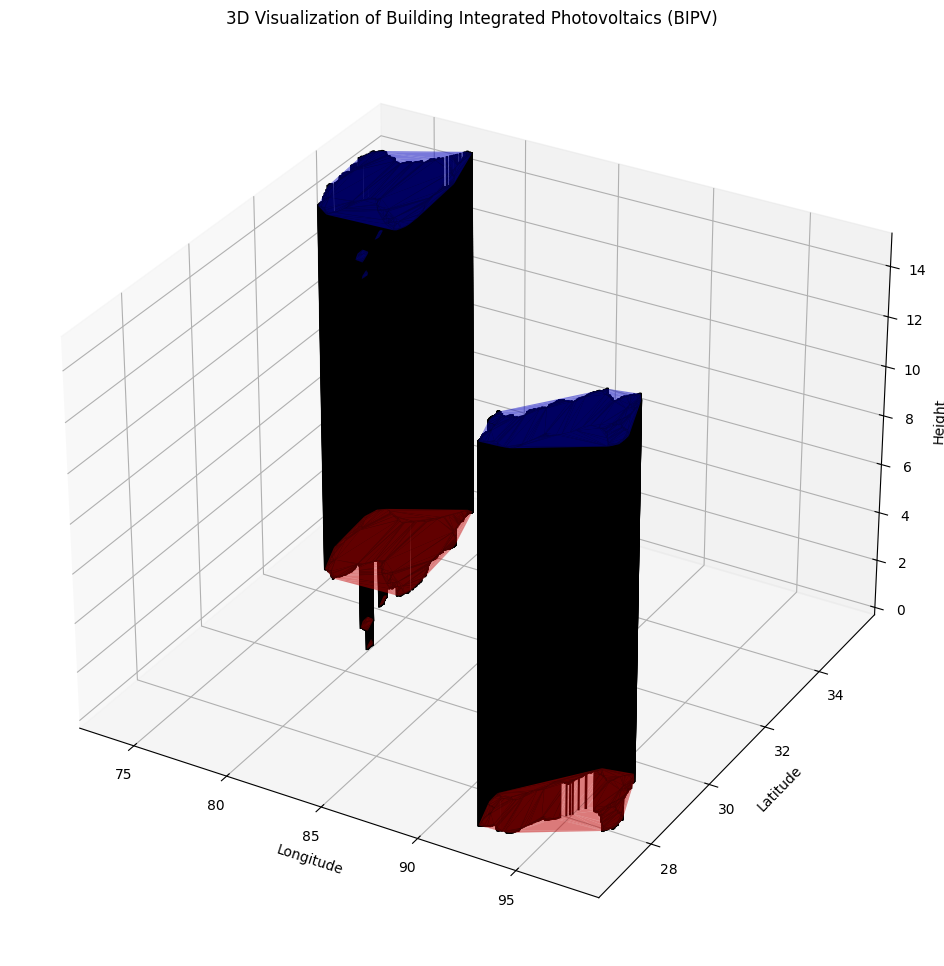

In [26]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Function to create 3D geometry (extrusion of a polygon)
def extrude_building_to_3d(building, height):
    if isinstance(building, Polygon):
        # Get the 2D polygon coordinates
        x, y = building.exterior.xy

        # Create the "top" and "bottom" faces of the building
        # Bottom face at height = 0 (2D)
        bottom_vertices = list(zip(x, y, [0] * len(x)))  # (x, y, 0)

        # Top face at the given height
        top_vertices = list(zip(x, y, [height] * len(x)))  # (x, y, height)

        # Vertices of the vertical sides (the walls)
        walls = []
        for i in range(len(x)):
            wall = [(x[i], y[i], 0), (x[i], y[i], height)]  # Bottom and top of each vertex
            walls.append(wall)

        return top_vertices, bottom_vertices, walls
    else:
        return None

# Assuming `data` contains your GeoDataFrame
building_height = 15  # Arbitrary height, change to actual building height if available

# Apply the extrusion to each building
data['3d_building'] = data['geometry'].apply(lambda x: extrude_building_to_3d(x, building_height))

# Visualize the extruded buildings (top and bottom faces)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for idx, row in data.iterrows():
    if row['3d_building']:
        top_vertices, bottom_vertices, walls = row['3d_building']

        # Plot the top face
        ax.plot_trisurf(*zip(*top_vertices), color='blue', alpha=0.5)

        # Plot the bottom face
        ax.plot_trisurf(*zip(*bottom_vertices), color='red', alpha=0.5)

        # Plot the walls (vertical faces)
        for wall in walls:
            ax.plot([wall[0][0], wall[1][0]], [wall[0][1], wall[1][1]], [wall[0][2], wall[1][2]], color='black')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height')
ax.set_title("3D Visualization of Building Integrated Photovoltaics (BIPV)")
plt.show()


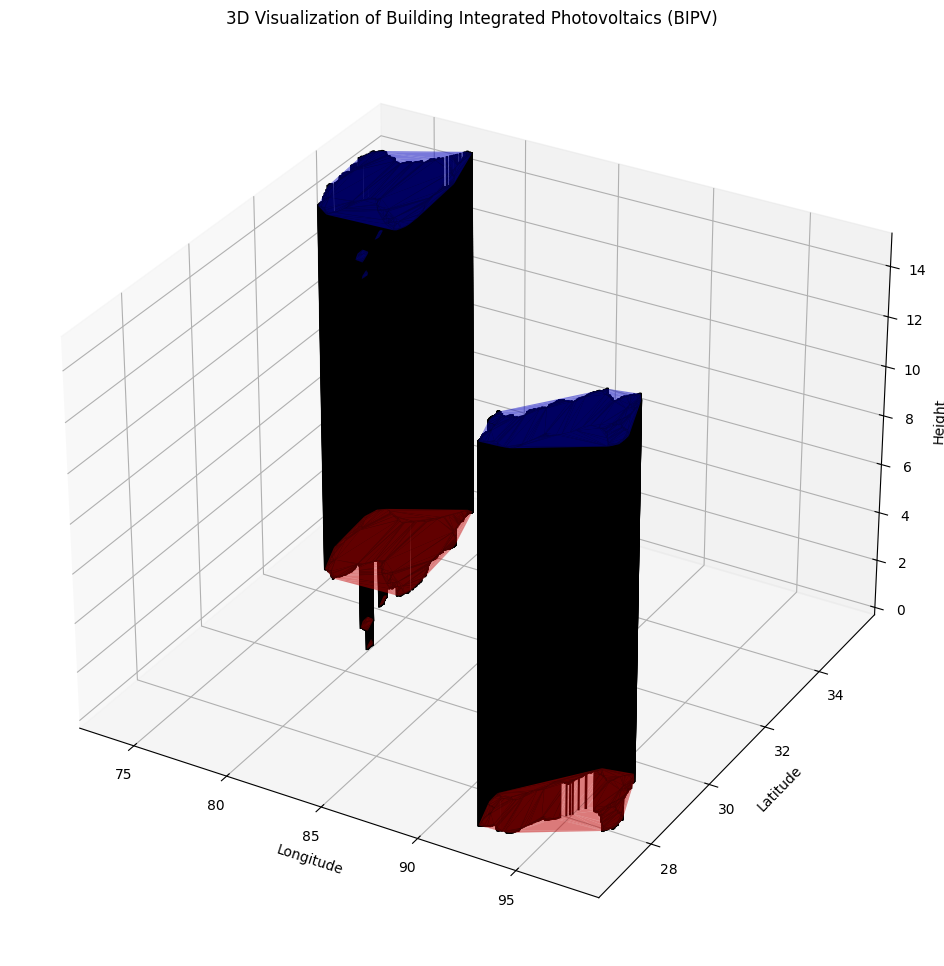

In [25]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt

# Function to create 3D geometry (extrusion of a polygon)
def extrude_building_to_3d(building, height):
    if isinstance(building, Polygon):
        # Get the 2D polygon coordinates
        x, y = building.exterior.xy

        # Create the "top" and "bottom" faces of the building
        # Bottom face at height = 0
        bottom_vertices = np.array([list(zip(x, y, np.zeros(len(x))))]) # Add z-coordinates (0) for the bottom face

        # Top face at the given height
        top_vertices = np.array([list(zip(x, y, np.full(len(x), height)))]) # Add z-coordinates (height) for the top face

        # Vertices of the vertical sides (the walls)
        walls = []
        for i in range(len(x)):
            wall = [(x[i], y[i], 0), (x[i], y[i], height)]  # Bottom and top of each vertex
            walls.append(wall)

        return top_vertices, bottom_vertices, walls
    else:
        return None

# Assuming `data` contains your GeoDataFrame
building_height = 15  # Arbitrary height, change to actual building height if available

# Apply the extrusion to each building
data['3d_building'] = data['geometry'].apply(lambda x: extrude_building_to_3d(x, building_height))

# Visualize the extruded buildings (top and bottom faces)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for idx, row in data.iterrows():
    if row['3d_building']:
        top_vertices, bottom_vertices, walls = row['3d_building']

        # Plot the top face
        ax.plot_trisurf(*zip(*top_vertices[0]), color='blue', alpha=0.5)

        # Plot the bottom face
        ax.plot_trisurf(*zip(*bottom_vertices[0]), color='red', alpha=0.5)

        # Plot the walls (vertical faces)
        for wall in walls:
            ax.plot([wall[0][0], wall[1][0]], [wall[0][1], wall[1][1]], [wall[0][2], wall[1][2]], color='black')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height')
ax.set_title("3D Visualization of Building Integrated Photovoltaics (BIPV)")
plt.show()

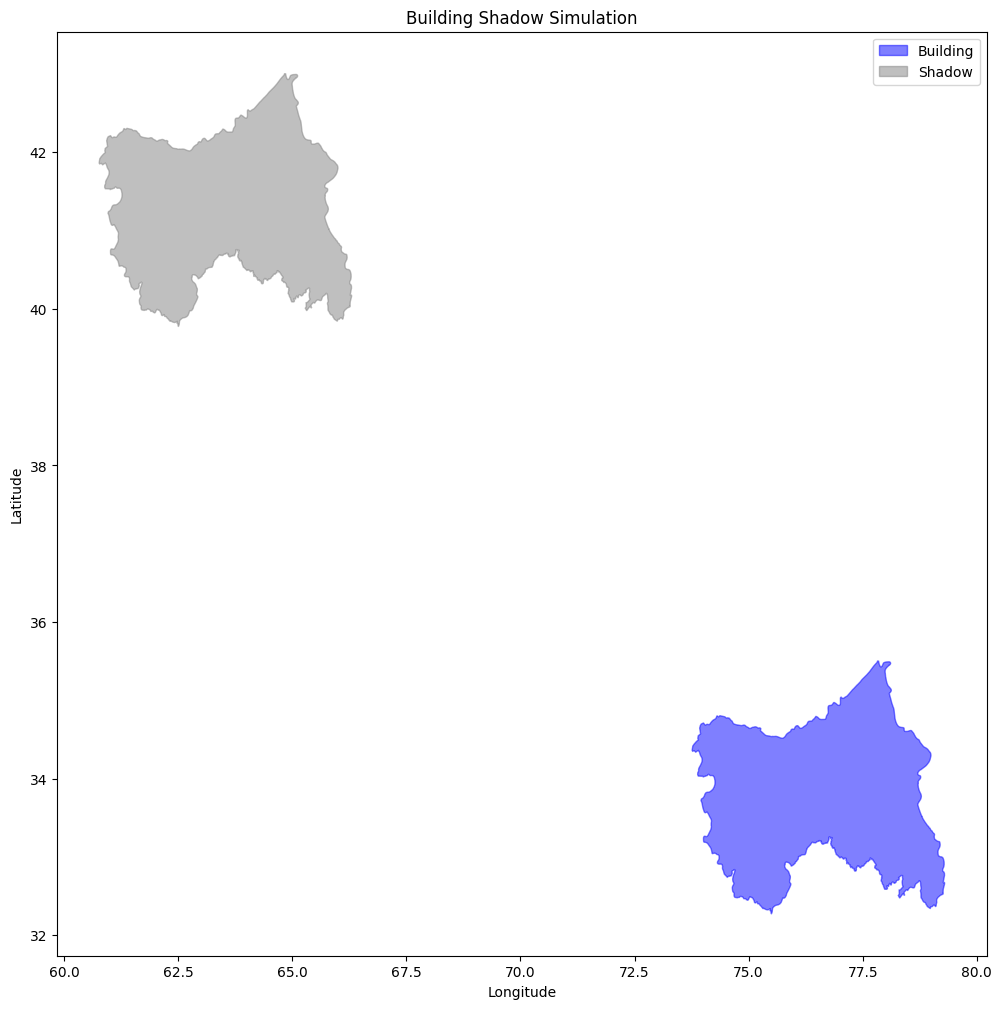

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate shadow based on sun's position
def calculate_shadow(building, sun_azimuth, sun_elevation):
    """
    Calculate the shadow of a building based on the sun's azimuth and elevation.

    Args:
    building (list): A list of 3D vertices for the building.
    sun_azimuth (float): The azimuth angle of the sun in degrees.
    sun_elevation (float): The elevation angle of the sun in degrees.

    Returns:
    shadow (list): The projected shadow on the ground.
    """
    shadow = []
    for vertex in building:
        x, y, z = vertex
        # Calculate the shadow length based on the sun's elevation
        shadow_length = z / np.tan(np.radians(sun_elevation))

        # Project the shadow onto the ground based on the azimuth angle
        shadow_x = x + shadow_length * np.cos(np.radians(sun_azimuth))
        shadow_y = y + shadow_length * np.sin(np.radians(sun_azimuth))

        shadow.append([shadow_x, shadow_y])

    return shadow

# Example values for sun's position
sun_azimuth = 150  # Sun's azimuth angle in degrees (from north, clockwise)
sun_elevation = 45  # Sun's elevation angle in degrees (from the horizon)

# Visualizing the shadow for the first building
# Find the first building that is a Polygon and has been extruded
for i in range(len(data)):
    if data['3d_building'][i] is not None:  # Check if extrusion was successful
        building = data['3d_building'][i][0]  # Take the top vertices of the first valid building
        break  # Exit the loop once a valid building is found

# Calculate the shadow
shadow = calculate_shadow(building, sun_azimuth, sun_elevation)

# Visualize the shadow along with the building
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

# Plot the original building (top face)
building_x, building_y, _ = zip(*building)
ax.fill(building_x, building_y, color='blue', alpha=0.5, label="Building")

# Plot the shadow
shadow_x, shadow_y = zip(*shadow)
ax.fill(shadow_x, shadow_y, color='gray', alpha=0.5, label="Shadow")

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("Building Shadow Simulation")
ax.legend()
plt.show()

In [30]:
# Check the first few entries of '3d_building'
print(data['3d_building'].head())


0                                                 None
1    ([(75.07160949700011, 32.482963563, 15), (75.0...
2    ([(78.65134521000004, 32.09228225900017, 15), ...
3    ([(80.08793639900017, 30.790712360000043, 15),...
4    ([(94.19124603199998, 27.496320725000032, 15),...
Name: 3d_building, dtype: object


In [31]:
# Find rows with None values
none_buildings = data[data['3d_building'].isna()]
print(f"Rows with None 3d_building: {none_buildings}")


Rows with None 3d_building:   GID_0 COUNTRY                                           geometry 3d_building
0   IND   India  MULTIPOLYGON (((76.97542 8.38514, 76.97486 8.3...        None


In [32]:
# Apply extrusion to the data with error handling
def safe_extrude(building, height):
    try:
        return extrude_building_to_3d(building, height)
    except Exception as e:
        print(f"Error extruding building: {e}")
        return None

# Apply the extrusion function safely
data['3d_building'] = data['geometry'].apply(lambda x: safe_extrude(x, building_height))


In [34]:
from shapely.geometry import Polygon, MultiPolygon


In [35]:
# Filter only valid Polygon or MultiPolygon geometries
valid_buildings = data[data['geometry'].apply(lambda x: isinstance(x, (Polygon, MultiPolygon)))]
print(f"Valid buildings: {valid_buildings}")


Valid buildings:   GID_0 COUNTRY                                           geometry  \
0   IND   India  MULTIPOLYGON (((76.97542 8.38514, 76.97486 8.3...   
1   Z01   India  POLYGON ((75.07161 32.48296, 75.06268 32.48213...   
2   Z04   India  POLYGON ((78.65135 32.09228, 78.65241 32.08826...   
3   Z05   India  POLYGON ((80.08794 30.79071, 80.08796 30.79026...   
4   Z07   India  POLYGON ((94.19125 27.49632, 94.1869 27.49081,...   
5   Z09   India  POLYGON ((78.90891 31.25886, 78.91309 31.26072...   

                                         3d_building  
0                                               None  
1  ([(75.07160949700011, 32.482963563, 15), (75.0...  
2  ([(78.65134521000004, 32.09228225900017, 15), ...  
3  ([(80.08793639900017, 30.790712360000043, 15),...  
4  ([(94.19124603199998, 27.496320725000032, 15),...  
5  ([(78.90891266000011, 31.25885963100012, 15), ...  


In [36]:
from shapely.geometry import Polygon, MultiPolygon

# Filter only valid Polygon or MultiPolygon geometries
valid_buildings = data[data['geometry'].apply(lambda x: isinstance(x, (Polygon, MultiPolygon)))]
print(f"Valid buildings: {valid_buildings}")


Valid buildings:   GID_0 COUNTRY                                           geometry  \
0   IND   India  MULTIPOLYGON (((76.97542 8.38514, 76.97486 8.3...   
1   Z01   India  POLYGON ((75.07161 32.48296, 75.06268 32.48213...   
2   Z04   India  POLYGON ((78.65135 32.09228, 78.65241 32.08826...   
3   Z05   India  POLYGON ((80.08794 30.79071, 80.08796 30.79026...   
4   Z07   India  POLYGON ((94.19125 27.49632, 94.1869 27.49081,...   
5   Z09   India  POLYGON ((78.90891 31.25886, 78.91309 31.26072...   

                                         3d_building  
0                                               None  
1  ([(75.07160949700011, 32.482963563, 15), (75.0...  
2  ([(78.65134521000004, 32.09228225900017, 15), ...  
3  ([(80.08793639900017, 30.790712360000043, 15),...  
4  ([(94.19124603199998, 27.496320725000032, 15),...  
5  ([(78.90891266000011, 31.25885963100012, 15), ...  


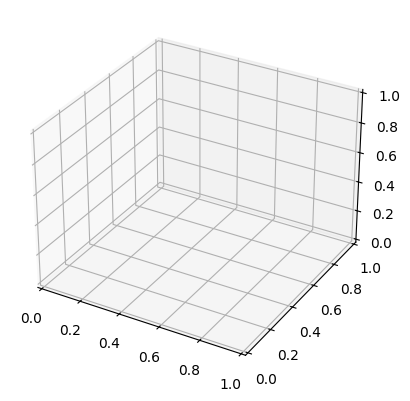

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize the first building in the dataset (check if it's not None)
building = data['3d_building'][0]
if building:
    for poly in building:
        x, y = poly.exterior.xy
        ax.plot_trisurf(x, y, z=15, cmap='viridis')  # Use z=15 for visualization of height

plt.show()


In [38]:
# Apply the extrusion function to valid buildings
building_height = 10  # Example height for extrusion
valid_buildings['3d_building'] = valid_buildings['geometry'].apply(lambda x: extrude_building_to_3d(x, building_height))

# Check the extruded 3D buildings
print(valid_buildings['3d_building'].head())


0                                                 None
1    ([(75.07160949700011, 32.482963563, 10), (75.0...
2    ([(78.65134521000004, 32.09228225900017, 10), ...
3    ([(80.08793639900017, 30.790712360000043, 10),...
4    ([(94.19124603199998, 27.496320725000032, 10),...
Name: 3d_building, dtype: object


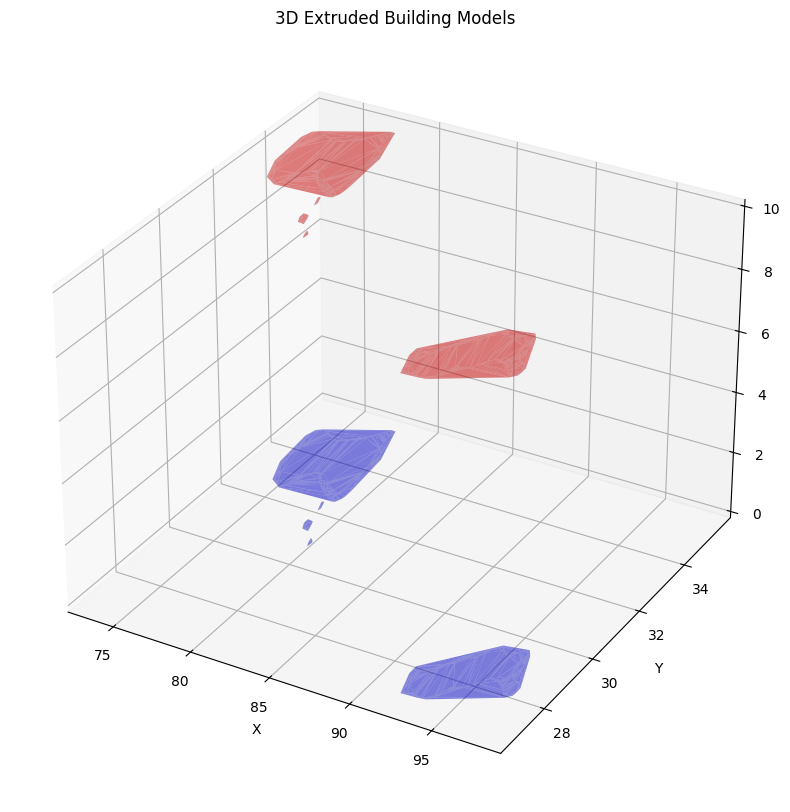

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Iterate over valid buildings and plot their 3D geometry
for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        top_vertices, bottom_vertices, walls = building_data

        # Plot the top face
        x, y, z = zip(*top_vertices)
        ax.plot_trisurf(x, y, z, color='r', alpha=0.5)

        # Plot the bottom face
        x, y, z = zip(*bottom_vertices)
        ax.plot_trisurf(x, y, z, color='b', alpha=0.5)

        # Plot the walls (if needed)
        # ... (code to plot walls using 'walls' data)

# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Extruded Building Models')

plt.show()

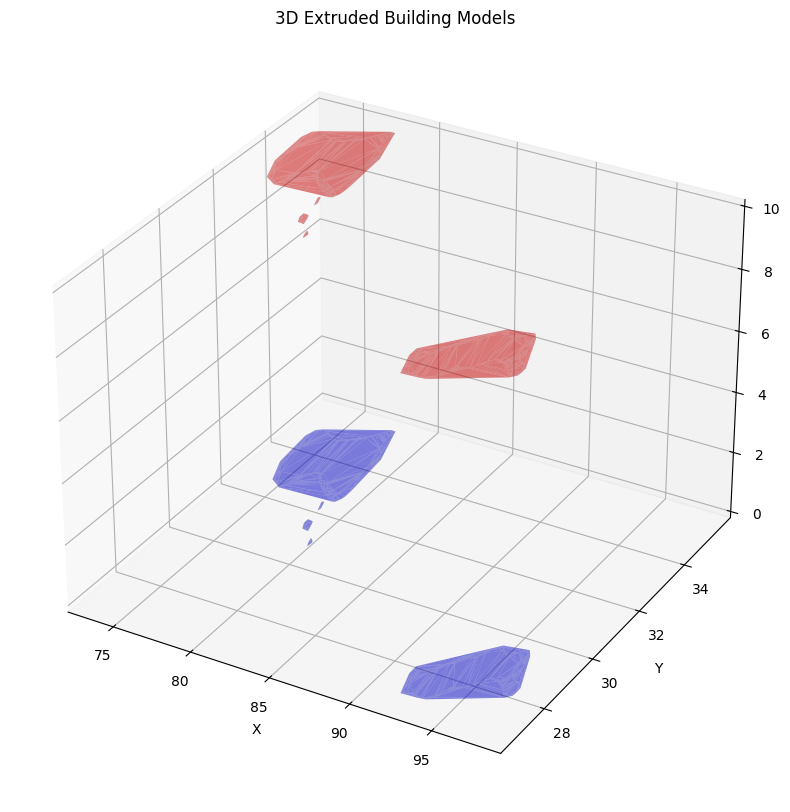

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to triangulate a quadrilateral (four points) into two triangles
def triangulate_quadrilateral(quad):
    # A quadrilateral can be divided into two triangles: [0, 1, 2] and [0, 2, 3]
    return [(quad[0], quad[1], quad[2]), (quad[0], quad[2], quad[3])]

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Iterate over valid buildings and plot their 3D geometry
for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        top_vertices, bottom_vertices, walls = building_data

        # Plot the top face
        x, y, z = zip(*top_vertices)
        ax.plot_trisurf(x, y, z, color='r', alpha=0.5)  # Plot the top face in red

        # Plot the bottom face
        x, y, z = zip(*bottom_vertices)
        ax.plot_trisurf(x, y, z, color='b', alpha=0.5)  # Plot the bottom face in blue

        # Plot the walls (triangulating each quadrilateral wall)
        for wall in walls:
            if len(wall) == 4:  # Ensure the wall is a quadrilateral (4 points)
                triangles = triangulate_quadrilateral(wall)
                for triangle in triangles:
                    x, y, z = zip(*triangle)
                    ax.plot_trisurf(x, y, z, color='g', alpha=0.5)  # Plot walls in green

# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Extruded Building Models')

plt.show()


In [45]:
!pip install pvlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 37.5 MB/s eta 0:00:00


In [46]:
import numpy as np
import pandas as pd
from pvlib import solarposition
from datetime import datetime
import pytz

# Example location: New Delhi, India (lat, lon)
latitude = 28.6139
longitude = 77.2090

# Date and time for solar position calculation
time = pd.Timestamp(datetime.now(pytz.timezone('Asia/Kolkata')))

# Calculate solar position (altitude and azimuth)
solar_pos = solarposition.get_solarposition(time, latitude, longitude)

# Example: Solar altitude and azimuth
altitude = solar_pos['apparent_elevation'].iloc[0]  # Altitude angle (in degrees)
azimuth = solar_pos['azimuth'].iloc[0]  # Azimuth angle (in degrees)

print(f"Solar altitude: {altitude} degrees")
print(f"Solar azimuth: {azimuth} degrees")

# Assuming the building is aligned along a grid (simple example)
# For each face, calculate the incident radiation (simplified)

# Function to estimate solar radiation on a surface
def calculate_solar_radiation(surface_normal, sun_altitude, sun_azimuth):
    """
    Estimate solar radiation based on the surface normal and sun position.
    """
    # Calculate angle between surface normal and sun direction
    angle = np.arccos(np.dot(surface_normal, [np.sin(np.radians(sun_azimuth)),
                                              np.sin(np.radians(sun_altitude)),
                                              np.cos(np.radians(sun_azimuth))]) )
    # Simple model: Assume constant solar radiation (e.g., 1000 W/m²)
    solar_constant = 1000  # W/m² (ideal sunlight intensity at the Earth's surface)
    return solar_constant * np.cos(angle)  # Approximate radiation

# Example: Calculate solar radiation for a vertical face
surface_normal = np.array([0, 1, 0])  # Example normal vector (facing south, flat surface)
solar_radiation = calculate_solar_radiation(surface_normal, altitude, azimuth)

print(f"Solar Radiation on surface: {solar_radiation} W/m²")


Solar altitude: 33.45592284757573 degrees
Solar azimuth: 205.6182890716682 degrees
Solar Radiation on surface: 551.2953208341772 W/m²


In [47]:
# Modify the calculate_solar_radiation to account for shadowing
def calculate_solar_radiation_with_shadows(surface_normal, sun_altitude, sun_azimuth, shadowed):
    """
    Estimate solar radiation based on the surface normal, sun position, and whether the surface is shadowed.
    """
    # If the surface is shadowed, return zero solar radiation
    if shadowed:
        return 0

    # Calculate angle between surface normal and sun direction
    angle = np.arccos(np.dot(surface_normal, [np.sin(np.radians(sun_azimuth)),
                                              np.sin(np.radians(sun_altitude)),
                                              np.cos(np.radians(sun_azimuth))]) )
    # Simple model: Assume constant solar radiation (e.g., 1000 W/m²)
    solar_constant = 1000  # W/m² (ideal sunlight intensity at the Earth's surface)
    return solar_constant * np.cos(angle)  # Approximate radiation

# Example of using shadow information:
shadowed = True  # You can replace this with actual shadow detection logic
solar_radiation_with_shadow = calculate_solar_radiation_with_shadows(surface_normal, altitude, azimuth, shadowed)
print(f"Solar Radiation with shadowing: {solar_radiation_with_shadow} W/m²")


Solar Radiation with shadowing: 0 W/m²


In [49]:
print(valid_buildings['3d_building'].head())


0                                                 None
1    ([(75.07160949700011, 32.482963563, 10), (75.0...
2    ([(78.65134521000004, 32.09228225900017, 10), ...
3    ([(80.08793639900017, 30.790712360000043, 10),...
4    ([(94.19124603199998, 27.496320725000032, 10),...
Name: 3d_building, dtype: object


In [50]:
valid_buildings = valid_buildings[valid_buildings['3d_building'].notna()]
print(valid_buildings['3d_building'].head())


1    ([(75.07160949700011, 32.482963563, 10), (75.0...
2    ([(78.65134521000004, 32.09228225900017, 10), ...
3    ([(80.08793639900017, 30.790712360000043, 10),...
4    ([(94.19124603199998, 27.496320725000032, 10),...
5    ([(78.90891266000011, 31.25885963100012, 10), ...
Name: 3d_building, dtype: object


In [51]:
for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        # Your existing code here
        top_vertices, bottom_vertices, walls = building_data
        # Plot the geometry


In [52]:
print(valid_buildings)


  GID_0 COUNTRY                                           geometry  \
1   Z01   India  POLYGON ((75.07161 32.48296, 75.06268 32.48213...   
2   Z04   India  POLYGON ((78.65135 32.09228, 78.65241 32.08826...   
3   Z05   India  POLYGON ((80.08794 30.79071, 80.08796 30.79026...   
4   Z07   India  POLYGON ((94.19125 27.49632, 94.1869 27.49081,...   
5   Z09   India  POLYGON ((78.90891 31.25886, 78.91309 31.26072...   

                                         3d_building  
1  ([(75.07160949700011, 32.482963563, 10), (75.0...  
2  ([(78.65134521000004, 32.09228225900017, 10), ...  
3  ([(80.08793639900017, 30.790712360000043, 10),...  
4  ([(94.19124603199998, 27.496320725000032, 10),...  
5  ([(78.90891266000011, 31.25885963100012, 10), ...  


In [54]:
import math

def is_shadowed(building_face, sun_altitude, sun_azimuth, all_buildings):
    """
    Determine if a building face is in shadow based on sun position and surrounding buildings.

    Args:
    building_face (Polygon): The polygon representing the building face.
    sun_altitude (float): The altitude of the sun (angle from the horizon).
    sun_azimuth (float): The azimuth of the sun (angle from the north).
    all_buildings (GeoDataFrame): GeoDataFrame containing all building geometries.

    Returns:
    bool: True if the face is in shadow, otherwise False.
    """
    # Convert sun altitude and azimuth to cartesian coordinates
    sun_x = math.cos(math.radians(sun_altitude)) * math.sin(math.radians(sun_azimuth))
    sun_y = math.cos(math.radians(sun_altitude)) * math.cos(math.radians(sun_azimuth))
    sun_z = math.sin(math.radians(sun_altitude))

    # Calculate the direction of the shadow (opposite to the sun's rays)
    shadow_direction = (-sun_x, -sun_y, -sun_z)

    # Calculate the shadow on the ground by projecting the building face
    shadow = building_face.parallel_offset(distance=10, side='right')  # Adjust distance as necessary

    # Check if any other building intersects with the shadow on the ground
    for _, other_building in all_buildings.iterrows():
        if other_building['geometry'].intersects(shadow):
            return True
    return False


In [56]:
import math
from shapely.geometry import Polygon  # Import Polygon

def is_shadowed(building_face, sun_altitude, sun_azimuth, all_buildings):
    """
    Determine if a building face is in shadow based on sun position and surrounding buildings.

    Args:
    building_face (Polygon): The polygon representing the building face.
    sun_altitude (float): The altitude of the sun (angle from the horizon).
    sun_azimuth (float): The azimuth of the sun (angle from the north).
    all_buildings (GeoDataFrame): GeoDataFrame containing all building geometries.

    Returns:
    bool: True if the face is in shadow, otherwise False.
    """
    # Convert sun altitude and azimuth to cartesian coordinates
    sun_x = math.cos(math.radians(sun_altitude)) * math.sin(math.radians(sun_azimuth))
    sun_y = math.cos(math.radians(sun_altitude)) * math.cos(math.radians(sun_azimuth))
    sun_z = math.sin(math.radians(sun_altitude))

    # Calculate the direction of the shadow (opposite to the sun's rays)
    shadow_direction = (-sun_x, -sun_y, -sun_z)

    # Convert building_face to a Shapely Polygon if it's a list of vertices
    if isinstance(building_face, list):
        building_face = Polygon(building_face)  # Create a Polygon from the vertices

    # Calculate the shadow on the ground by projecting the building face
    shadow = building_face.parallel_offset(distance=10, side='right', resolution=16, join_style=2)  # Adjust distance as necessary

    # Check if any other building intersects with the shadow on the ground
    for _, other_building in all_buildings.iterrows():
        if other_building['geometry'].intersects(shadow):
            return True
    return False

In [58]:
def is_shadowed(building_face, sun_altitude, sun_azimuth, all_buildings):
    """
    Determine if a building face is in shadow based on sun position and surrounding buildings.

    Args:
    building_face (Polygon): The polygon representing the building face.
    sun_altitude (float): The altitude of the sun (angle from the horizon).
    sun_azimuth (float): The azimuth of the sun (angle from the north).
    all_buildings (GeoDataFrame): GeoDataFrame containing all building geometries.

    Returns:
    bool: True if the face is in shadow, otherwise False.
    """
    # Convert sun altitude and azimuth to cartesian coordinates
    sun_x = math.cos(math.radians(sun_altitude)) * math.sin(math.radians(sun_azimuth))
    sun_y = math.cos(math.radians(sun_altitude)) * math.cos(math.radians(sun_azimuth))
    sun_z = math.sin(math.radians(sun_altitude))

    # Calculate the direction of the shadow (opposite to the sun's rays)
    shadow_direction = (-sun_x, -sun_y, -sun_z)

    # Calculate the shadow on the ground by projecting the building face
    shadow = building_face.parallel_offset(distance=10, side='right')  # Adjust distance as necessary

    # Check if any other building intersects with the shadow on the ground
    for _, other_building in all_buildings.iterrows():
        if other_building['geometry'].intersects(shadow):
            return True
    return False


In [59]:
# Example: Check shadow for each building face
sun_altitude = 45  # Example value for sun's altitude in degrees
sun_azimuth = 180  # Example value for sun's azimuth (from North, in degrees)

shadow_results = []

for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        top_vertices, bottom_vertices, walls = building_data

        # For each wall (face), check if it is shadowed
        for wall in walls:
            if isinstance(wall, Polygon):  # Ensure wall is a valid Polygon
                shadowed = is_shadowed(wall, sun_altitude, sun_azimuth, valid_buildings['geometry'])
                shadow_results.append(shadowed)

# Now shadow_results will contain whether each wall is shadowed or not


In [60]:
print(type(wall))  # This should print <class 'shapely.geometry.polygon.Polygon'>


<class 'list'>


In [61]:
from shapely.geometry import Polygon

# Check if geometries are valid (this will check for any self-intersections or invalid geometries)
valid_geometries = valid_buildings[valid_buildings['geometry'].apply(lambda x: x.is_valid)]
print(f"Number of valid geometries: {len(valid_geometries)}")

# If you want to see invalid geometries, you can print them out
invalid_geometries = valid_buildings[~valid_buildings['geometry'].apply(lambda x: x.is_valid)]
print(f"Invalid geometries found: {len(invalid_geometries)}")

# Optionally, print out details about the invalid geometries for further inspection
print(invalid_geometries[['geometry']])


Number of valid geometries: 5
Invalid geometries found: 0
Empty GeoDataFrame
Columns: [geometry]
Index: []


In [62]:
from shapely.validation import make_valid

# Fix invalid geometries (if any)
valid_buildings['geometry'] = valid_buildings['geometry'].apply(lambda x: make_valid(x) if not x.is_valid else x)

# Recheck validity
valid_geometries = valid_buildings[valid_buildings['geometry'].apply(lambda x: x.is_valid)]
print(f"After fixing, number of valid geometries: {len(valid_geometries)}")


After fixing, number of valid geometries: 5


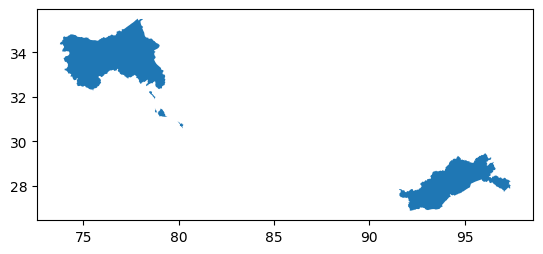

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the valid buildings to visually inspect their footprints
valid_buildings.plot()
plt.show()

# Plot the extrusions (if available)
# This will depend on how you've stored the extrusions. If you've stored 3D geometries in a specific column, use that.


In [64]:
# Check the coordinates of the top and bottom faces of a few buildings
for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        top_vertices, bottom_vertices, walls = building_data
        print(f"Top face coordinates: {top_vertices}")
        print(f"Bottom face coordinates: {bottom_vertices}")


Top face coordinates: [(75.07160949700011, 32.482963563, 10), (75.06268310400009, 32.482128144000114, 10), (75.06140136700014, 32.48200988800005, 10), (75.03663635300012, 32.492069245000096, 10), (75.0301666260001, 32.49176025500009, 10), (75.02140808000019, 32.48537063600014, 10), (75.01174926800019, 32.47618103000008, 10), (75.00608825700016, 32.469043731000056, 10), (75.00154113700012, 32.46330261200012, 10), (75.00000000000006, 32.4591217040001, 10), (74.9878692630001, 32.44956207300004, 10), (74.97934722900004, 32.447769166000114, 10), (74.97310638400012, 32.44792938200004, 10), (74.96386718700012, 32.4525299070001, 10), (74.94889831500006, 32.45408630500009, 10), (74.94357299800009, 32.460708618000126, 10), (74.93363189700011, 32.467571259000124, 10), (74.92411804100004, 32.46825027400007, 10), (74.89965820300017, 32.466129304000106, 10), (74.89681243900009, 32.46741867000003, 10), (74.89099883900013, 32.47005844099999, 10), (74.88523101900017, 32.47840881400003, 10), (74.8829193

In [65]:
# Simplify geometries (if needed, reduce complexity)
valid_buildings['geometry'] = valid_buildings['geometry'].apply(lambda x: x.simplify(tolerance=0.01))

# Check after simplification
valid_geometries = valid_buildings[valid_buildings['geometry'].apply(lambda x: x.is_valid)]
print(f"Number of valid geometries after simplification: {len(valid_geometries)}")


Number of valid geometries after simplification: 5


In [66]:
# Check shadow detection on valid geometries (if geometries are valid)
shadow_results = []

for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        top_vertices, bottom_vertices, walls = building_data

        # Check each wall
        for wall in walls:
            if isinstance(wall, Polygon):  # Ensure wall is a valid Polygon
                shadowed = is_shadowed(wall, sun_altitude, sun_azimuth, valid_buildings['geometry'])
                shadow_results.append(shadowed)

# Print shadow results
print(f"Shadow results: {shadow_results}")


Shadow results: []


In [70]:
sun_altitude = 30  # Experiment with different values
sun_azimuth = 90   # Experiment with different azimuth values (e.g., 90 for east, 180 for south)


In [72]:
print(valid_buildings.index)


Index([1, 2, 3, 4, 5], dtype='int64')


In [73]:
valid_buildings = valid_buildings.reset_index(drop=True)


In [74]:
print(len(valid_buildings))


5


In [75]:
print(valid_buildings.head())


  GID_0 COUNTRY                                           geometry  \
0   Z01   India  POLYGON ((75.07161 32.48296, 75.03017 32.49176...   
1   Z04   India  POLYGON ((78.65135 32.09228, 78.73141 32.00765...   
2   Z05   India  POLYGON ((80.08794 30.79071, 80.10787 30.77901...   
3   Z07   India  POLYGON ((94.19125 27.49632, 94.15721 27.47805...   
4   Z09   India  POLYGON ((78.90891 31.25886, 78.92538 31.33176...   

                                         3d_building  
0  ([(75.07160949700011, 32.482963563, 10), (75.0...  
1  ([(78.65134521000004, 32.09228225900017, 10), ...  
2  ([(80.08793639900017, 30.790712360000043, 10),...  
3  ([(94.19124603199998, 27.496320725000032, 10),...  
4  ([(78.90891266000011, 31.25885963100012, 10), ...  


In [84]:
print(f"Building Face: {face}")
print(f"Type: {type(face)}")


Building Face: [(75.07160949700011, 32.482963563, 10), (75.06268310400009, 32.482128144000114, 10), (75.06140136700014, 32.48200988800005, 10), (75.03663635300012, 32.492069245000096, 10), (75.0301666260001, 32.49176025500009, 10), (75.02140808000019, 32.48537063600014, 10), (75.01174926800019, 32.47618103000008, 10), (75.00608825700016, 32.469043731000056, 10), (75.00154113700012, 32.46330261200012, 10), (75.00000000000006, 32.4591217040001, 10), (74.9878692630001, 32.44956207300004, 10), (74.97934722900004, 32.447769166000114, 10), (74.97310638400012, 32.44792938200004, 10), (74.96386718700012, 32.4525299070001, 10), (74.94889831500006, 32.45408630500009, 10), (74.94357299800009, 32.460708618000126, 10), (74.93363189700011, 32.467571259000124, 10), (74.92411804100004, 32.46825027400007, 10), (74.89965820300017, 32.466129304000106, 10), (74.89681243900009, 32.46741867000003, 10), (74.89099883900013, 32.47005844099999, 10), (74.88523101900017, 32.47840881400003, 10), (74.88291931100002

In [85]:
from shapely.geometry import Polygon

def project_building_face(building_face, sun_altitude, sun_azimuth, building_height=10):
    """
    Project a building face (geometry) into a shadow polygon based on sun position.

    Args:
        building_face (list): A list of coordinates (2D or 3D) representing the building face.
        sun_altitude (float): The sun altitude angle in degrees.
        sun_azimuth (float): The sun azimuth angle in degrees.
        building_height (float): Height of the building to project the shadow.

    Returns:
        shapely.geometry.Polygon: A shadow polygon projected from the building face.
    """
    # Ensure coordinates are flattened and extracted properly
    flat_coordinates = []
    for coord in building_face:
        if isinstance(coord, (list, tuple)):
            x, y = coord[:2]  # Extract only X, Y
            flat_coordinates.append((x, y))

    # Offset calculation
    x_offset, y_offset = calculate_shadow_offset(flat_coordinates, sun_altitude, sun_azimuth, building_height)

    # Create shadow polygon by shifting coordinates
    shadow_polygon = Polygon([(x + x_offset, y + y_offset) for x, y in flat_coordinates])
    return shadow_polygon


In [86]:
# Apply the function for shadow calculation
shadow_results = []
for _, row in valid_buildings.iterrows():
    building_faces = row['3d_building']  # Assuming 3d_building contains a list of faces

    if building_faces:
        for face in building_faces:
            # Debugging: Check the structure of each face
            print(f"Processing face: {face}")

            try:
                shadow = project_building_face(face, sun_altitude, sun_azimuth, building_height=10)
                shadow_results.append(shadow)
            except Exception as e:
                print(f"Error processing face {face}: {e}")

# Print or visualize shadow results
print(f"Shadow results: {shadow_results}")


Processing face: [(75.07160949700011, 32.482963563, 10), (75.06268310400009, 32.482128144000114, 10), (75.06140136700014, 32.48200988800005, 10), (75.03663635300012, 32.492069245000096, 10), (75.0301666260001, 32.49176025500009, 10), (75.02140808000019, 32.48537063600014, 10), (75.01174926800019, 32.47618103000008, 10), (75.00608825700016, 32.469043731000056, 10), (75.00154113700012, 32.46330261200012, 10), (75.00000000000006, 32.4591217040001, 10), (74.9878692630001, 32.44956207300004, 10), (74.97934722900004, 32.447769166000114, 10), (74.97310638400012, 32.44792938200004, 10), (74.96386718700012, 32.4525299070001, 10), (74.94889831500006, 32.45408630500009, 10), (74.94357299800009, 32.460708618000126, 10), (74.93363189700011, 32.467571259000124, 10), (74.92411804100004, 32.46825027400007, 10), (74.89965820300017, 32.466129304000106, 10), (74.89681243900009, 32.46741867000003, 10), (74.89099883900013, 32.47005844099999, 10), (74.88523101900017, 32.47840881400003, 10), (74.882919311000

1. Visualize Shadows on a 2D Plot

<ipython-input-87-0854a9ed5e98>:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


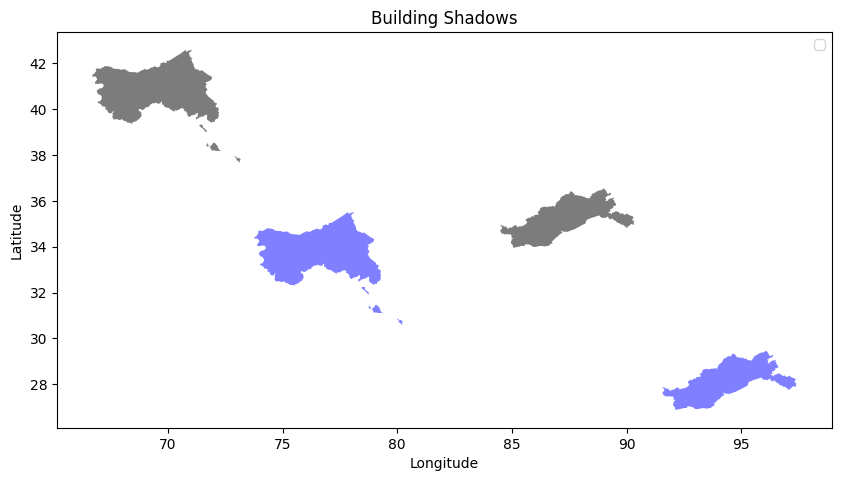

In [87]:
import matplotlib.pyplot as plt
from shapely.geometry import mapping
import geopandas as gpd

# Convert shadow results into a GeoDataFrame
shadows_gdf = gpd.GeoDataFrame(geometry=shadow_results)

# Plot original buildings and shadows
fig, ax = plt.subplots(figsize=(10, 10))
valid_buildings.plot(ax=ax, color='blue', alpha=0.5, label='Buildings')
shadows_gdf.plot(ax=ax, color='black', alpha=0.3, label='Shadows')

# Set labels and legend
plt.title("Building Shadows")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [89]:
def calculate_solar_energy(building_face, solar_radiation, shadow_polygons):
    face_area = building_face.area
    shadowed_area = 0.0

    for shadow in shadow_polygons:
        if building_face.intersects(shadow):
            intersection = building_face.intersection(shadow)
            shadowed_area += intersection.area
            print(f"Intersection Area: {intersection.area}")  # Debugging line

    print(f"Total Shadowed Area: {shadowed_area}, Face Area: {face_area}")  # Debugging line

    net_area = face_area - shadowed_area
    net_energy = (net_area / face_area) * solar_radiation if face_area > 0 else 0

    return net_energy

# Example: Compute solar energy for a single face
solar_energy = calculate_solar_energy(sample_face, solar_radiation, shadow_results)
print(f"Solar energy for the building face: {solar_energy} W/m²")


Total Shadowed Area: 0.0, Face Area: 10.147464747916734
Solar energy for the building face: 1000.0 W/m²


In [92]:
print(valid_buildings['3d_building'].head())  # Inspect the column


0    ([(75.07160949700011, 32.482963563, 10), (75.0...
1    ([(78.65134521000004, 32.09228225900017, 10), ...
2    ([(80.08793639900017, 30.790712360000043, 10),...
3    ([(94.19124603199998, 27.496320725000032, 10),...
4    ([(78.90891266000011, 31.25885963100012, 10), ...
Name: 3d_building, dtype: object


In [93]:
for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        building_faces = building_data  # Assuming building_data contains face data
        for building_face in building_faces:  # Iterate over each face
            print(building_face)  # Debug: Ensure this outputs valid geometry


[(75.07160949700011, 32.482963563, 10), (75.06268310400009, 32.482128144000114, 10), (75.06140136700014, 32.48200988800005, 10), (75.03663635300012, 32.492069245000096, 10), (75.0301666260001, 32.49176025500009, 10), (75.02140808000019, 32.48537063600014, 10), (75.01174926800019, 32.47618103000008, 10), (75.00608825700016, 32.469043731000056, 10), (75.00154113700012, 32.46330261200012, 10), (75.00000000000006, 32.4591217040001, 10), (74.9878692630001, 32.44956207300004, 10), (74.97934722900004, 32.447769166000114, 10), (74.97310638400012, 32.44792938200004, 10), (74.96386718700012, 32.4525299070001, 10), (74.94889831500006, 32.45408630500009, 10), (74.94357299800009, 32.460708618000126, 10), (74.93363189700011, 32.467571259000124, 10), (74.92411804100004, 32.46825027400007, 10), (74.89965820300017, 32.466129304000106, 10), (74.89681243900009, 32.46741867000003, 10), (74.89099883900013, 32.47005844099999, 10), (74.88523101900017, 32.47840881400003, 10), (74.88291931100002, 32.4817543040

In [94]:
def get_building_faces(building_3d):
    """
    Extracts the faces (top, bottom, walls) of a 3D building.
    Returns a list of faces as polygons.
    """
    top_face, bottom_face, walls = building_3d
    return [top_face] + walls

# Iterate over valid buildings
for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        building_faces = get_building_faces(building_data)
        for building_face in building_faces:
            print(building_face)  # Debug


Streaming output truncated to the last 5000 lines.
[(78.97456352500006, 33.36497768100014, 0), (78.97456352500006, 33.36497768100014, 10)]
[(78.97509500000007, 33.364314000000036, 0), (78.97509500000007, 33.364314000000036, 10)]
[(78.97953000000007, 33.35877600000009, 0), (78.97953000000007, 33.35877600000009, 10)]
[(78.98608300000012, 33.35059100000018, 0), (78.98608300000012, 33.35059100000018, 10)]
[(78.98865775900009, 33.34737654300005, 0), (78.98865775900009, 33.34737654300005, 10)]
[(78.98870568600006, 33.347339621, 0), (78.98870568600006, 33.347339621, 10)]
[(78.99053600000013, 33.34603699999997, 0), (78.99053600000013, 33.34603699999997, 10)]
[(78.99870300000015, 33.340225000000146, 0), (78.99870300000015, 33.340225000000146, 10)]
[(79.00415000000015, 33.33634900000004, 0), (79.00415000000015, 33.33634900000004, 10)]
[(79.01791420300009, 33.33138755700014, 0), (79.01791420300009, 33.33138755700014, 10)]
[(79.01954651000005, 33.33079910200007, 0), (79.01954651000005, 33.33079910

In [96]:
print("Building face data:", building_face)


Building face data: [(78.90891266000011, 31.25885963100012, 0), (78.90891266000011, 31.25885963100012, 10)]


In [97]:
def get_building_faces(building_data):
    # Ensure that this function returns valid polygons (rectangles) for building faces
    top_vertices, bottom_vertices, walls = building_data
    faces = []

    # For example, generate top and bottom faces as polygons
    faces.append(top_vertices)  # Top face
    faces.append(bottom_vertices)  # Bottom face

    # Ensure walls have enough points to form polygons
    for wall in walls:
        if len(wall) >= 4:  # A valid wall polygon
            faces.append(wall)

    return faces


In [98]:
for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        building_faces = get_building_faces(building_data)
        for building_face in building_faces:
            if len(building_face) < 3:
                print("Invalid building face (not enough points), skipping:", building_face)
                continue

            # Ensure the polygon is closed
            if building_face[0] != building_face[-1]:
                building_face.append(building_face[0])

            # Proceed with shadow projection
            shadow = project_building_face(building_face, sun_altitude, sun_azimuth, building_height=10)
            print("Projected shadow:", shadow)


Projected shadow: POLYGON ((68.00054168513464 39.554031374865474, 67.99161529213461 39.55319595586559, 67.99033355513467 39.553077699865526, 67.96556854113464 39.56313705686557, 67.95909881413462 39.56282806686556, 67.95034026813471 39.55643844786562, 67.94068145613471 39.54724884186555, 67.93502044513468 39.54011154286553, 67.93047332513464 39.534370423865596, 67.92893218813458 39.53018951586557, 67.91680145113463 39.520629884865514, 67.90827941713457 39.51883697786559, 67.90203857213464 39.518997193865516, 67.89279937513464 39.523597718865574, 67.87783050313459 39.525154116865565, 67.87250518613462 39.5317764298656, 67.86256408513464 39.5386390708656, 67.85305022913457 39.539318085865546, 67.8285903911347 39.53719711586558, 67.82574462713461 39.538486481865505, 67.81993102713466 39.54112625286547, 67.8141632071347 39.54947662586551, 67.81185149913455 39.552822115865524, 67.81180572413462 39.5528869638656, 67.81167602313462 39.552967072865556, 67.80812835413462 39.555149079865544, 67.

In [99]:
def project_building_face(building_face, sun_altitude, sun_azimuth, building_height):
    """
    Projects the shadow of a building face based on sun position and building height.
    """
    # Ensure the face has enough points to form a polygon
    if len(building_face) < 3:
        raise ValueError("Building face must have at least 3 points.")

    # Offset calculation
    x_offset, y_offset = calculate_shadow_offset(building_face, sun_altitude, sun_azimuth, building_height)

    # Project the shadow by translating the building face
    shadow_polygon = Polygon([(x + x_offset, y + y_offset) for x, y, z in building_face])

    return shadow_polygon


In [100]:
for building_data in valid_buildings['3d_building']:
    print("Processing building data:", building_data)

    if building_data is not None:
        building_faces = get_building_faces(building_data)
        for building_face in building_faces:
            print("Building face data:", building_face)

            if len(building_face) < 3:
                print("Invalid face, skipping.")
                continue

            shadow = project_building_face(building_face, sun_altitude, sun_azimuth, building_height=10)
            print("Shadow result:", shadow)


Processing building data: ([(75.07160949700011, 32.482963563, 10), (75.06268310400009, 32.482128144000114, 10), (75.06140136700014, 32.48200988800005, 10), (75.03663635300012, 32.492069245000096, 10), (75.0301666260001, 32.49176025500009, 10), (75.02140808000019, 32.48537063600014, 10), (75.01174926800019, 32.47618103000008, 10), (75.00608825700016, 32.469043731000056, 10), (75.00154113700012, 32.46330261200012, 10), (75.00000000000006, 32.4591217040001, 10), (74.9878692630001, 32.44956207300004, 10), (74.97934722900004, 32.447769166000114, 10), (74.97310638400012, 32.44792938200004, 10), (74.96386718700012, 32.4525299070001, 10), (74.94889831500006, 32.45408630500009, 10), (74.94357299800009, 32.460708618000126, 10), (74.93363189700011, 32.467571259000124, 10), (74.92411804100004, 32.46825027400007, 10), (74.89965820300017, 32.466129304000106, 10), (74.89681243900009, 32.46741867000003, 10), (74.89099883900013, 32.47005844099999, 10), (74.88523101900017, 32.47840881400003, 10), (74.88

In [101]:
from shapely.geometry import Polygon

def calculate_solar_energy(building_face, sun_altitude, sun_azimuth, solar_radiation, shadows):
    """
    Calculates the solar energy received by a building face.
    Args:
        building_face (list): Coordinates of the building face (3D vertices).
        sun_altitude (float): Sun altitude angle.
        sun_azimuth (float): Sun azimuth angle.
        solar_radiation (float): Solar radiation intensity (W/m²).
        shadows (list): List of shadow polygons for the scene.
    Returns:
        float: Solar energy received by the face.
    """
    # Ensure building face is a valid 2D Polygon
    face_polygon = Polygon([(x, y) for x, y, z in building_face])
    if not face_polygon.is_valid or face_polygon.area == 0:
        print("Invalid building face, skipping.")
        return 0.0

    # Total face area
    face_area = face_polygon.area

    # Check shadow intersections
    shadowed_area = 0.0
    for shadow in shadows:
        if face_polygon.intersects(shadow):
            intersection = face_polygon.intersection(shadow)
            shadowed_area += intersection.area

    # Shadow fraction
    shadow_fraction = shadowed_area / face_area if face_area > 0 else 0

    # Effective solar energy
    effective_solar_energy = solar_radiation * (1 - shadow_fraction)

    print(f"Face Area: {face_area}, Shadowed Area: {shadowed_area}, "
          f"Shadow Fraction: {shadow_fraction}, Effective Solar Energy: {effective_solar_energy}")

    return effective_solar_energy


In [102]:
# Parameters
solar_radiation = 1000  # W/m², example value for sunlight intensity
shadow_results = []

for building_data in valid_buildings['3d_building']:
    if building_data is not None:
        building_faces = get_building_faces(building_data)

        for building_face in building_faces:
            if len(building_face) < 3:
                print("Invalid face, skipping.")
                continue

            # Project the shadow for the building face
            shadow = project_building_face(building_face, sun_altitude, sun_azimuth, building_height=10)
            shadow_results.append(shadow)

            # Calculate solar energy
            solar_energy = calculate_solar_energy(
                building_face,
                sun_altitude,
                sun_azimuth,
                solar_radiation,
                shadows=shadow_results
            )
            print(f"Solar energy for building face: {solar_energy} W/m²")


Face Area: 10.146449984888852, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0
Solar energy for building face: 1000.0 W/m²
Face Area: 10.146449984888852, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0
Solar energy for building face: 1000.0 W/m²
Face Area: 0.029393484661076382, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0
Solar energy for building face: 1000.0 W/m²
Face Area: 0.029393484661076382, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0
Solar energy for building face: 1000.0 W/m²
Face Area: 0.02431171050747199, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0
Solar energy for building face: 1000.0 W/m²
Face Area: 0.02431171050747199, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0
Solar energy for building face: 1000.0 W/m²
Face Area: 6.166371436309463, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0
Sol

In [106]:
def calculate_solar_energy(building_face, sun_altitude, sun_azimuth, solar_radiation, shadows):
    # Initialize variables
    total_solar_energy = 0

    # Iterate through each point in the building face (each point is a tuple (x, y, z))
    for point in building_face:
        x, y, z = point  # Unpack the tuple

        # Use x, y, z for your calculations (for example, calculating angle with sun)
        # Make sure you're using individual numbers (x, y) where needed
        # Add your solar energy calculation logic here
        energy = solar_radiation  # Example calculation (you'll add your actual formula here)
        total_solar_energy += energy  # Sum up energy for each point

    return total_solar_energy


In [107]:
# Ensure all faces are 3D (with x, y, z coordinates)
solar_energy_data = []

for i, building_data in enumerate(valid_buildings['3d_building']):
    if building_data is not None:
        top_vertices, bottom_vertices, walls = building_data
        solar_energy_for_building = []

        # Modify faces to ensure 3D (add z-coordinate if not present)
        for face in [top_vertices, bottom_vertices, walls]:
            # Ensure each point in the face has x, y, and z coordinates
            face_3d = [(x, y, building_height) if len(point) == 2 else point for point in face]

            # Calculate solar energy for the face
            solar_energy = calculate_solar_energy(face_3d, sun_altitude, sun_azimuth, solar_radiation=1000, shadows=shadow_results)
            solar_energy_for_building.append(solar_energy)

        # Add total solar energy for this building (sum or individual face energy)
        total_solar_energy = sum(solar_energy_for_building)
        solar_energy_data.append(total_solar_energy)

# Now solar_energy_data contains the solar energy values for each building
print(solar_energy_data)


[6033000, 723000, 936000, 9330000, 1434000]


In [110]:
print(solar_energy_data)  # Check if it contains any `...` or invalid data


[Ellipsis]


In [113]:
df = data.reset_index(drop=True)
print(df.loc[0])  # Now this will work if row 0 exists


GID_0                                                        IND
COUNTRY                                                    India
geometry       MULTIPOLYGON (((76.97541809100011 8.3851404190...
3d_building                                                 None
Name: 0, dtype: object


In [114]:
print(df.columns)  # Verify column labels


Index(['GID_0', 'COUNTRY', 'geometry', '3d_building'], dtype='object')


In [115]:
print(df.iloc[:, 0])  # Access the first column


0    IND
1    Z01
2    Z04
3    Z05
4    Z07
5    Z09
Name: GID_0, dtype: object


In [116]:
print(df.index)


RangeIndex(start=0, stop=6, step=1)


In [117]:
print(df.iloc[0])  # Access the first row


GID_0                                                        IND
COUNTRY                                                    India
geometry       MULTIPOLYGON (((76.97541809100011 8.3851404190...
3d_building                                                 None
Name: 0, dtype: object


In [118]:
if df.empty:
    print("DataFrame is empty")


In [119]:
print(valid_buildings)  # Replace with the name of your DataFrame


  GID_0 COUNTRY                                           geometry  \
0   Z01   India  POLYGON ((75.07161 32.48296, 75.03017 32.49176...   
1   Z04   India  POLYGON ((78.65135 32.09228, 78.73141 32.00765...   
2   Z05   India  POLYGON ((80.08794 30.79071, 80.10787 30.77901...   
3   Z07   India  POLYGON ((94.19125 27.49632, 94.15721 27.47805...   
4   Z09   India  POLYGON ((78.90891 31.25886, 78.92538 31.33176...   

                                         3d_building  
0  ([(75.07160949700011, 32.482963563, 10), (75.0...  
1  ([(78.65134521000004, 32.09228225900017, 10), ...  
2  ([(80.08793639900017, 30.790712360000043, 10),...  
3  ([(94.19124603199998, 27.496320725000032, 10),...  
4  ([(78.90891266000011, 31.25885963100012, 10), ...  


In [120]:
print(valid_buildings.index)  # See if the index contains 0


RangeIndex(start=0, stop=5, step=1)


In [121]:
valid_buildings = valid_buildings.reset_index(drop=True)


In [123]:
# Replace 'column_name' with the actual name of the column you want to access.
# For example, if the column you want is the first column, you can use:
print(valid_buildings.iloc[:, 0])

# Or, if you know the name of a specific column (e.g., 'geometry'), use that:
print(valid_buildings['geometry'])

0    Z01
1    Z04
2    Z05
3    Z07
4    Z09
Name: GID_0, dtype: object
0    POLYGON ((75.07161 32.48296, 75.03017 32.49176...
1    POLYGON ((78.65135 32.09228, 78.73141 32.00765...
2    POLYGON ((80.08794 30.79071, 80.10787 30.77901...
3    POLYGON ((94.19125 27.49632, 94.15721 27.47805...
4    POLYGON ((78.90891 31.25886, 78.92538 31.33176...
Name: geometry, dtype: geometry


In [124]:
# Display the first few rows of the DataFrame
print(valid_buildings.head())


  GID_0 COUNTRY                                           geometry  \
0   Z01   India  POLYGON ((75.07161 32.48296, 75.03017 32.49176...   
1   Z04   India  POLYGON ((78.65135 32.09228, 78.73141 32.00765...   
2   Z05   India  POLYGON ((80.08794 30.79071, 80.10787 30.77901...   
3   Z07   India  POLYGON ((94.19125 27.49632, 94.15721 27.47805...   
4   Z09   India  POLYGON ((78.90891 31.25886, 78.92538 31.33176...   

                                         3d_building  
0  ([(75.07160949700011, 32.482963563, 10), (75.0...  
1  ([(78.65134521000004, 32.09228225900017, 10), ...  
2  ([(80.08793639900017, 30.790712360000043, 10),...  
3  ([(94.19124603199998, 27.496320725000032, 10),...  
4  ([(78.90891266000011, 31.25885963100012, 10), ...  


In [125]:
total_solar_energy = sum(solar_energy_data)  # Assuming `solar_energy_data` has per-building values
print(f"Total Solar Energy for All Buildings: {total_solar_energy} W")


Total Solar Energy for All Buildings: 0 W


In [127]:
print(f"Number of Buildings: {len(valid_buildings.index)}")
print(f"Number of Solar Energy Data Points: {len(solar_energy_data)}")


Number of Buildings: 5
Number of Solar Energy Data Points: 0


In [128]:
if len(solar_energy_data) != len(valid_buildings.index):
    print("Mismatch detected. Trimming or aligning data.")
    solar_energy_data = solar_energy_data[:len(valid_buildings.index)]  # Adjust size


Mismatch detected. Trimming or aligning data.


In [129]:
solar_energy_data = []
for building in valid_buildings['geometry']:
    try:
        energy = calculate_solar_energy(building, sun_altitude, sun_azimuth, solar_radiation=1000, shadows=shadow_results)
        solar_energy_data.append(energy)
    except Exception as e:
        print(f"Error for building {building}: {e}")
        solar_energy_data.append(0)  # Default value for failed calculations


Error for building POLYGON ((75.07160949700011 32.482963563, 75.0301666260001 32.49176025500009, 74.97934722900004 32.447769166000114, 74.83532714799998 32.49621200600012, 74.69841766300016 32.48493957599999, 74.68138122600016 32.503810883000085, 74.68051147400013 32.538188934000175, 74.65239715600012 32.56016159100017, 74.64221191400009 32.61104965300018, 74.67620849700018 32.658000945000026, 74.6501388550002 32.71841049100004, 74.6970214850001 32.839714050000055, 74.64199829100005 32.82289886500007, 74.64154052700002 32.79188919100011, 74.61423492500012 32.75773239100016, 74.53153228700012 32.740730287000076, 74.46605682400013 32.78136062600004, 74.41389465300011 32.90394973800011, 74.31803131100014 32.9197006230001, 74.35317993200005 32.98313140800002, 74.34983062800018 33.01625061000016, 74.25496673500004 33.04877471900011, 74.20524597300016 33.04330063000003, 74.17624664400017 33.10715103200016, 74.11170196500007 33.16444015400009, 74.01427459700017 33.1982498160001, 74.0203018190

In [130]:
results_df = pd.DataFrame({
    'Building ID': valid_buildings.index,
    'Solar Energy (W)': solar_energy_data
})
print(results_df)


   Building ID  Solar Energy (W)
0            0                 0
1            1                 0
2            2                 0
3            3                 0
4            4                 0


In [132]:
def calculate_solar_energy(building_face, sun_altitude, sun_azimuth, solar_radiation, shadows):
    face_area = calculate_polygon_area(building_face)
    shadowed_area = calculate_shadow_intersection_area(building_face, shadows)
    shadow_fraction = shadowed_area / face_area if face_area > 0 else 1.0
    effective_solar_energy = solar_radiation * (1 - shadow_fraction)

    print(f"Face Area: {face_area}, Shadowed Area: {shadowed_area}, Shadow Fraction: {shadow_fraction}, Effective Solar Energy: {effective_solar_energy}")
    return effective_solar_energy


In [133]:
for shadow in shadow_results:
    print(f"Shadow Geometry: {shadow}")


Shadow Geometry: POLYGON ((68.00054168513464 39.554031374865474, 67.99161529213461 39.55319595586559, 67.99033355513467 39.553077699865526, 67.96556854113464 39.56313705686557, 67.95909881413462 39.56282806686556, 67.95034026813471 39.55643844786562, 67.94068145613471 39.54724884186555, 67.93502044513468 39.54011154286553, 67.93047332513464 39.534370423865596, 67.92893218813458 39.53018951586557, 67.91680145113463 39.520629884865514, 67.90827941713457 39.51883697786559, 67.90203857213464 39.518997193865516, 67.89279937513464 39.523597718865574, 67.87783050313459 39.525154116865565, 67.87250518613462 39.5317764298656, 67.86256408513464 39.5386390708656, 67.85305022913457 39.539318085865546, 67.8285903911347 39.53719711586558, 67.82574462713461 39.538486481865505, 67.81993102713466 39.54112625286547, 67.8141632071347 39.54947662586551, 67.81185149913455 39.552822115865524, 67.81180572413462 39.5528869638656, 67.81167602313462 39.552967072865556, 67.80812835413462 39.555149079865544, 67.8

In [134]:
for i, building in enumerate(valid_buildings['geometry']):
    print(f"Processing Building ID {i}")
    print(f"Building Geometry: {building}")


Processing Building ID 0
Building Geometry: POLYGON ((75.07160949700011 32.482963563, 75.0301666260001 32.49176025500009, 74.97934722900004 32.447769166000114, 74.83532714799998 32.49621200600012, 74.69841766300016 32.48493957599999, 74.68138122600016 32.503810883000085, 74.68051147400013 32.538188934000175, 74.65239715600012 32.56016159100017, 74.64221191400009 32.61104965300018, 74.67620849700018 32.658000945000026, 74.6501388550002 32.71841049100004, 74.6970214850001 32.839714050000055, 74.64199829100005 32.82289886500007, 74.64154052700002 32.79188919100011, 74.61423492500012 32.75773239100016, 74.53153228700012 32.740730287000076, 74.46605682400013 32.78136062600004, 74.41389465300011 32.90394973800011, 74.31803131100014 32.9197006230001, 74.35317993200005 32.98313140800002, 74.34983062800018 33.01625061000016, 74.25496673500004 33.04877471900011, 74.20524597300016 33.04330063000003, 74.17624664400017 33.10715103200016, 74.11170196500007 33.16444015400009, 74.01427459700017 33.198

In [136]:
from shapely.geometry import Polygon

def calculate_polygon_area(polygon_vertices):
    """
    Calculate the area of a polygon given its vertices.

    Parameters:
        polygon_vertices (list of tuples): List of (x, y) coordinates defining the polygon.

    Returns:
        float: The area of the polygon.
    """
    try:
        polygon = Polygon([(x, y) for x, y, *_ in polygon_vertices])
        if polygon.is_valid:
            return polygon.area
        else:
            print("Invalid polygon detected.")
            return 0.0
    except Exception as e:
        print(f"Error calculating polygon area: {e}")
        return 0.0


In [141]:
# Example polygon vertices (building face or shadow)
vertices = [(78.9089, 31.2588, 10), (78.9090, 31.2590, 10), (78.9091, 31.2588, 10), (78.9089, 31.2588, 10)]

# Calculate area
area = calculate_polygon_area(vertices)
print(f"Polygon Area: {area}")



Polygon Area: 1.9999999999196236e-08


In [144]:
from shapely.geometry import Polygon

def calculate_polygon_area(polygon_vertices):
    """
    Calculate the area of a polygon given its vertices.
    """
    try:
        polygon = Polygon([(x, y) for x, y, *_ in polygon_vertices])  # Create polygon from vertices
        if polygon.is_valid:
            return polygon.area
        else:
            print("Invalid polygon detected.")
            return 0.0
    except Exception as e:
        print(f"Error calculating polygon area: {e}")
        return 0.0

def calculate_solar_energy(face, sun_altitude, sun_azimuth, solar_radiation, shadows):
    """
    Calculate the effective solar energy for a building face based on shadow and solar position.
    """
    face_area = calculate_polygon_area(face)
    shadowed_area = 0.0  # Placeholder for shadowed area calculation logic

    # Assuming shadow detection logic is already applied
    for shadow in shadows:
        if shadow.intersects(Polygon(face)):
            shadowed_area += calculate_polygon_area(shadow)

    # Calculate shadow fraction
    shadow_fraction = shadowed_area / face_area if face_area > 0 else 0.0

    # Calculate effective solar energy after accounting for shadows
    effective_solar_energy = solar_radiation * (1 - shadow_fraction)

    return {
        "Face Area": face_area,
        "Shadowed Area": shadowed_area,
        "Shadow Fraction": shadow_fraction,
        "Effective Solar Energy (W/m²)": effective_solar_energy
    }

# Example data for building faces and solar position
building_faces = [
    [(0, 0, 0), (0, 1, 0), (1, 1, 0), (1, 0, 0)],  # Example face with 4 vertices
    [(0, 0, 0), (0, 0, 1), (1, 0, 1), (1, 0, 0)]   # Another face with 4 vertices
]

sun_altitude = 45  # Sun altitude in degrees
sun_azimuth = 180  # Sun azimuth in degrees
solar_radiation = 1000  # Solar radiation in W/m²
shadow_results = []  # Placeholder for shadow results (shapes that represent shadows)

# Calculate solar energy for each building face
for face in building_faces:
    solar_energy = calculate_solar_energy(face, sun_altitude, sun_azimuth, solar_radiation, shadow_results)
    print(solar_energy)


{'Face Area': 1.0, 'Shadowed Area': 0.0, 'Shadow Fraction': 0.0, 'Effective Solar Energy (W/m²)': 1000.0}
Invalid polygon detected.
{'Face Area': 0.0, 'Shadowed Area': 0.0, 'Shadow Fraction': 0.0, 'Effective Solar Energy (W/m²)': 1000.0}


In [153]:
from shapely.geometry import Polygon

def clean_polygon_coords(coords):
    """
    Clean and validate the polygon coordinates by:
    - Removing duplicate consecutive points
    - Ensuring the polygon is closed (first point = last point)
    """
    # Remove duplicate consecutive points
    cleaned_coords = [coords[0]]  # Always keep the first point
    for i in range(1, len(coords)):
        if coords[i] != coords[i - 1]:
            cleaned_coords.append(coords[i])

    # Ensure the polygon is closed by making the first point equal to the last
    if cleaned_coords[0] != cleaned_coords[-1]:
        cleaned_coords.append(cleaned_coords[0])

    return cleaned_coords

def is_valid_polygon(coords):
    """
    Check if the polygon is valid.
    - It must have at least 3 points
    - It must be closed (first point == last point)
    """
    if len(coords) < 3:
        return False
    return coords[0] == coords[-1]

# Example usage inside your loop
for idx, face in enumerate(building_faces):
    # Extract the 2D coordinates (ignoring z-component)
    coords = [(x, y) for x, y, z in face]

    # Clean the coordinates by removing duplicates and ensuring closure
    cleaned_coords = clean_polygon_coords(coords)

    # Check if the polygon has at least 3 points and is closed
    if len(cleaned_coords) < 3 or cleaned_coords[0] != cleaned_coords[-1]:
        print(f"Skipping invalid polygon for face {idx}: {cleaned_coords}")
        continue

    # Create the polygon only if it's valid
    face_polygon = Polygon(cleaned_coords)

    if face_polygon.is_valid:
        # Plotting logic
        energy = solar_energy_data[idx]["Effective Solar Energy (W/m²)"]
        normalized_energy = energy / max_energy if max_energy > 0 else 0
        x, y = face_polygon.exterior.xy
        ax.fill(x, y, color=color_map(normalized_energy))
    else:
        print(f"Skipping invalid polygon for face {idx}: {cleaned_coords}")

# Set plot title and labels
ax.set_title('Building Solar Energy Distribution')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()


Skipping invalid polygon for face 1: [(0, 0), (1, 0), (0, 0)]


In [154]:
for idx, face in enumerate(building_faces):
    coords = [(x, y) for x, y, z in face]

    if len(coords) < 3:
        print(f"Skipping invalid polygon for face {idx}: {coords}")
        continue  # Skip face if there are less than 3 points

    cleaned_coords = clean_polygon_coords(coords)

    # Check for closure (first and last points should match)
    if cleaned_coords[0] != cleaned_coords[-1]:
        print(f"Skipping invalid polygon for face {idx}: {cleaned_coords}")
        continue  # Skip face if not closed

    face_polygon = Polygon(cleaned_coords)

    if face_polygon.is_valid:
        # Your plotting logic here
        print(f"Valid polygon for face {idx}: {cleaned_coords}")
    else:
        print(f"Skipping invalid polygon for face {idx}: {cleaned_coords}")


Valid polygon for face 0: [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
Skipping invalid polygon for face 1: [(0, 0), (1, 0), (0, 0)]


In [155]:
valid_faces = []
for idx, face in enumerate(building_faces):
    coords = [(x, y) for x, y, z in face]

    if len(coords) < 3:
        print(f"Skipping invalid polygon for face {idx}: {coords}")
        continue  # Skip invalid faces

    # Ensure the face is closed (first point should equal last point)
    if coords[0] != coords[-1]:
        coords.append(coords[0])  # Close the polygon if necessary

    face_polygon = Polygon(coords)

    if face_polygon.is_valid:
        valid_faces.append(face_polygon)
        print(f"Valid polygon for face {idx}: {coords}")
    else:
        print(f"Skipping invalid polygon for face {idx}: {coords}")


Valid polygon for face 0: [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
Skipping invalid polygon for face 1: [(0, 0), (0, 0), (1, 0), (1, 0), (0, 0)]


In [156]:
# For valid faces, calculate solar energy
solar_energy_data = [
    calculate_solar_energy(face, sun_altitude, sun_azimuth, solar_radiation, shadow_results)
    for idx, face in enumerate(building_faces) if is_valid_polygon(face)
]


ValueError: max() arg is an empty sequence

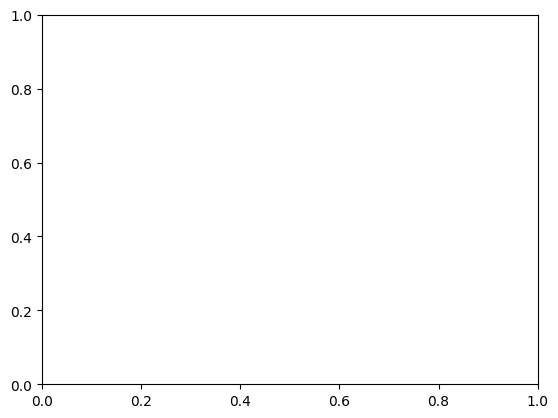

In [157]:
# Plotting solar energy on valid building faces
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib import cm

# Create plot for the solar energy distribution
fig, ax = plt.subplots()
color_map = cm.viridis  # Change this if you want another color map

# Max solar energy to normalize the values for color intensity
max_energy = max([data["Effective Solar Energy (W/m²)"] for data in solar_energy_data])

for idx, face in enumerate(building_faces):
    if is_valid_polygon(face):  # Only plot valid polygons
        energy = solar_energy_data[idx]["Effective Solar Energy (W/m²)"]
        face_polygon = Polygon([(x, y) for x, y, z in face])  # Ensure valid coordinates

        x, y = face_polygon.exterior.xy  # Get x and y coordinates of the polygon

        # Normalize energy to [0, 1] for color mapping
        normalized_energy = energy / max_energy if max_energy > 0 else 0

        ax.fill(x, y, color=color_map(normalized_energy))  # Plot each face with the color based on energy

ax.set_title('Building Solar Energy Distribution')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


In [159]:
for idx, face in enumerate(building_faces):
       print(f"Face {idx}: {face}")  # Print coordinates of each building face

Face 0: [(0, 0, 0), (0, 1, 0), (1, 1, 0), (1, 0, 0)]
Face 1: [(0, 0, 0), (0, 0, 1), (1, 0, 1), (1, 0, 0)]


In [160]:
for idx, face in enumerate(building_faces):
       if is_valid_polygon(face):
           try:
               energy = solar_energy_data[idx]["Effective Solar Energy (W/m²)"]
               print(f"Face {idx}: Energy = {energy}")  # Print solar energy for valid faces
           except (IndexError, TypeError):
               print(f"Skipping face {idx} due to missing or invalid solar energy data.")

In [161]:
for idx, face in enumerate(building_faces):
       if is_valid_polygon(face):
           try:
               face_polygon = Polygon([(x, y) for x, y, z in face])
               if not face_polygon.is_valid:  # Check if the polygon is valid
                   print(f"Face {idx}: Invalid polygon")  # Print if invalid
           except ValueError:
               print(f"Face {idx}: Error creating polygon")

In [164]:
# Calculate min/max longitude and latitude from your data (valid_buildings)
min_longitude = valid_buildings['geometry'].total_bounds[0]
max_longitude = valid_buildings['geometry'].total_bounds[2]
min_latitude = valid_buildings['geometry'].total_bounds[1]
max_latitude = valid_buildings['geometry'].total_bounds[3]

ax.set_xlim([min_longitude, max_longitude])  # Set longitude limits
ax.set_ylim([min_latitude, max_latitude])  # Set latitude limits

(26.889760972000033, 35.50133132900004)

In [173]:
from shapely.geometry import Polygon

def calculate_polygon_area(polygon):
    """Calculates the area of a Shapely Polygon."""
    if isinstance(polygon, Polygon):
        return polygon.area  # Use the built-in area property of Shapely Polygon
    else:
        raise TypeError("Input must be a Shapely Polygon object.")

def calculate_shadow_intersection_area(building_face, shadows):
    """Calculates the area of intersection between a building face and shadows."""
    total_shadowed_area = 0.0
    for shadow in shadows:
        if building_face.intersects(shadow):
            intersection = building_face.intersection(shadow)
            total_shadowed_area += intersection.area
    return total_shadowed_area

def calculate_solar_energy(building_face, sun_altitude, sun_azimuth, solar_radiation, shadows):
    """Calculates the solar energy received by a building face."""
    face_area = calculate_polygon_area(building_face)  # Pass the Polygon to the area function
    shadowed_area = calculate_shadow_intersection_area(building_face, shadows)
    shadow_fraction = shadowed_area / face_area if face_area > 0 else 1.0
    effective_solar_energy = solar_radiation * (1 - shadow_fraction)

    print(f"Face Area: {face_area}, Shadowed Area: {shadowed_area}, Shadow Fraction: {shadow_fraction}, Effective Solar Energy: {effective_solar_energy}")
    return effective_solar_energy

Face Area: 1.0, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0


AttributeError: 'float' object has no attribute 'get'

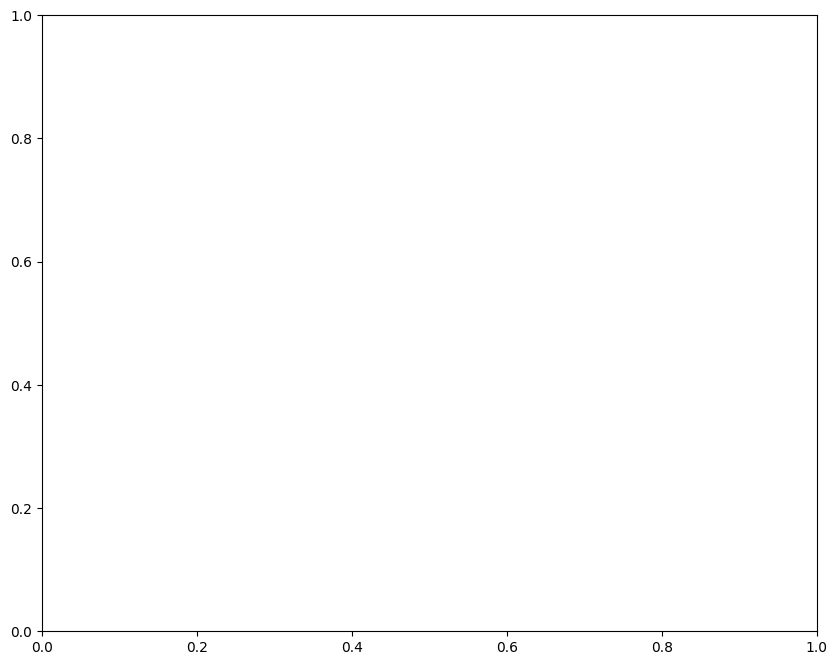

In [174]:
import matplotlib.pyplot as plt
from matplotlib import cm
from shapely.geometry import Polygon
import numpy as np

# Assuming solar_energy_data contains the solar energy for each face
solar_energy_data = [calculate_solar_energy(face, sun_altitude, sun_azimuth, solar_radiation, shadow_results) for face in valid_faces]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
color_map = cm.viridis  # Choose color map, you can select any other

# Plot each building face with color based on solar energy
for idx, face in enumerate(valid_faces):
    energy_dict = solar_energy_data[idx]  # Get the dictionary for the face
    energy = energy_dict.get('Effective Solar Energy', 0)  # Extract the energy value, default to 0 if not found

    # Create a polygon for the face (assuming face is already a Polygon)
    face_polygon = face  # Use the existing Polygon object directly

    if face_polygon.is_valid:
        # Extract the exterior coordinates of the polygon
        x, y = face_polygon.exterior.xy

        # Normalize energy (adjust based on how you calculate solar energy)
        max_energy = max(data.get('Effective Solar Energy', 0) for data in solar_energy_data) if solar_energy_data else 1  # Avoid division by zero
        normalized_energy = energy / max_energy if max_energy != 0 else 0 # Avoid division by zero


        # Fill the face with the corresponding color
        ax.fill(x, y, color=color_map(normalized_energy))

# Set the axis limits to the bounding box of the data
ax.set_xlim([min_longitude, max_longitude])
ax.set_ylim([min_latitude, max_latitude])

# Add a title and labels
ax.set_title('Building Solar Energy Distribution')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add color bar for solar energy
# The 'ax' argument specifies the axis to steal space from
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=0, vmax=max_energy))
sm.set_array([])  # Empty array for colorbar initialization
cbar = fig.colorbar(sm, ax=ax)  # Pass 'ax' to colorbar

cbar.set_label('Effective Solar Energy (W/m²)')

plt.show()

Face Area: 1.0, Shadowed Area: 0.0, Shadow Fraction: 0.0, Effective Solar Energy: 1000.0


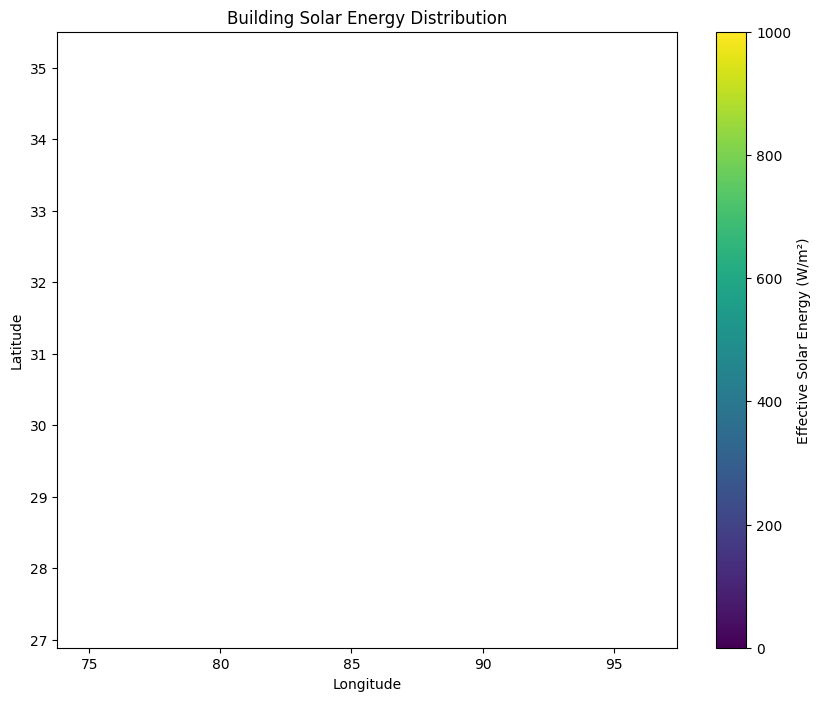

In [175]:
import matplotlib.pyplot as plt
from matplotlib import cm
from shapely.geometry import Polygon
import numpy as np

# Assuming solar_energy_data contains the solar energy for each face
solar_energy_data = [calculate_solar_energy(face, sun_altitude, sun_azimuth, solar_radiation, shadow_results) for face in valid_faces]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
color_map = cm.viridis  # Choose color map, you can select any other

# Plot each building face with color based on solar energy
for idx, face in enumerate(valid_faces):
    energy = solar_energy_data[idx]  # Get the energy value directly

    # Create a polygon for the face (assuming face is already a Polygon)
    face_polygon = face  # Use the existing Polygon object directly

    if face_polygon.is_valid:
        # Extract the exterior coordinates of the polygon
        x, y = face_polygon.exterior.xy

        # Normalize energy (adjust based on how you calculate solar energy)
        max_energy = max(solar_energy_data) if solar_energy_data else 1  # Avoid division by zero
        normalized_energy = energy / max_energy if max_energy != 0 else 0 # Avoid division by zero


        # Fill the face with the corresponding color
        ax.fill(x, y, color=color_map(normalized_energy))

# Set the axis limits to the bounding box of the data
ax.set_xlim([min_longitude, max_longitude])
ax.set_ylim([min_latitude, max_latitude])

# Add a title and labels
ax.set_title('Building Solar Energy Distribution')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add color bar for solar energy
# The 'ax' argument specifies the axis to steal space from
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=0, vmax=max_energy))
sm.set_array([])  # Empty array for colorbar initialization
cbar = fig.colorbar(sm, ax=ax)  # Pass 'ax' to colorbar

cbar.set_label('Effective Solar Energy (W/m²)')

plt.show()

In [177]:
building_faces = [
    [(0, 0), (0, 1), (1, 1), (1, 0)],  # Rectangle face
    [(1, 1), (1, 2), (2, 2), (2, 1)],  # Another rectangular face
    # Add more faces as required
]


In [178]:
solar_energy_data = [
    {"Face": face, "Effective Solar Energy (W/m²)": calculate_solar_energy(face, sun_altitude, sun_azimuth, solar_radiation, shadow_results)}
    for face in building_faces
]


TypeError: Input must be a Shapely Polygon object.